In [3]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
import sys
sys.executable
from numpy import *
import pandas as pd
#from matplotlib.pyplot import *
#%matplotlib inline
from bokeh.plotting import *
from bokeh.io import *
from filterpy.kalman import KalmanFilter

In [93]:
data = pd.read_csv("/home/dhruv/Inertial-Positioning-System/data_1.csv")
gyro_x = asanyarray(data.GyroX)

In [122]:
def kfilter(dt):
    kf = KalmanFilter(dim_x=2,dim_z=1)
    kf.F = array(([1,-dt],[0,1]))         #Transition Matrix
    kf.Q = array(([0.001,0],[0,0.01]))
    kf.B = 0
    kf.H = array([[1,0]])
    kf.R = 100
    kf.x = array(([0],[0]))
    kf.P = eye(2)*500
    return kf

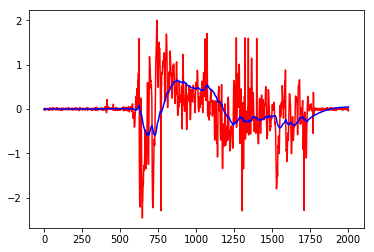

In [123]:
tracker = kfilter(0.006)
mu, cov, _, _ = tracker.batch_filter(gyro_x)
plot(data.Number,gyro_x,'r')
plot(data.Number,mu[:,0],'b')